# 一、前置准备
1、启动 Ollama Serve

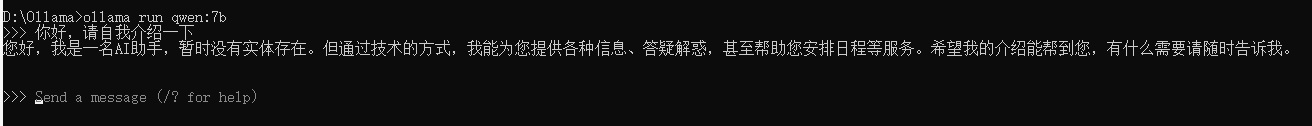

2、安装并启动Ollama(qwen:7b)
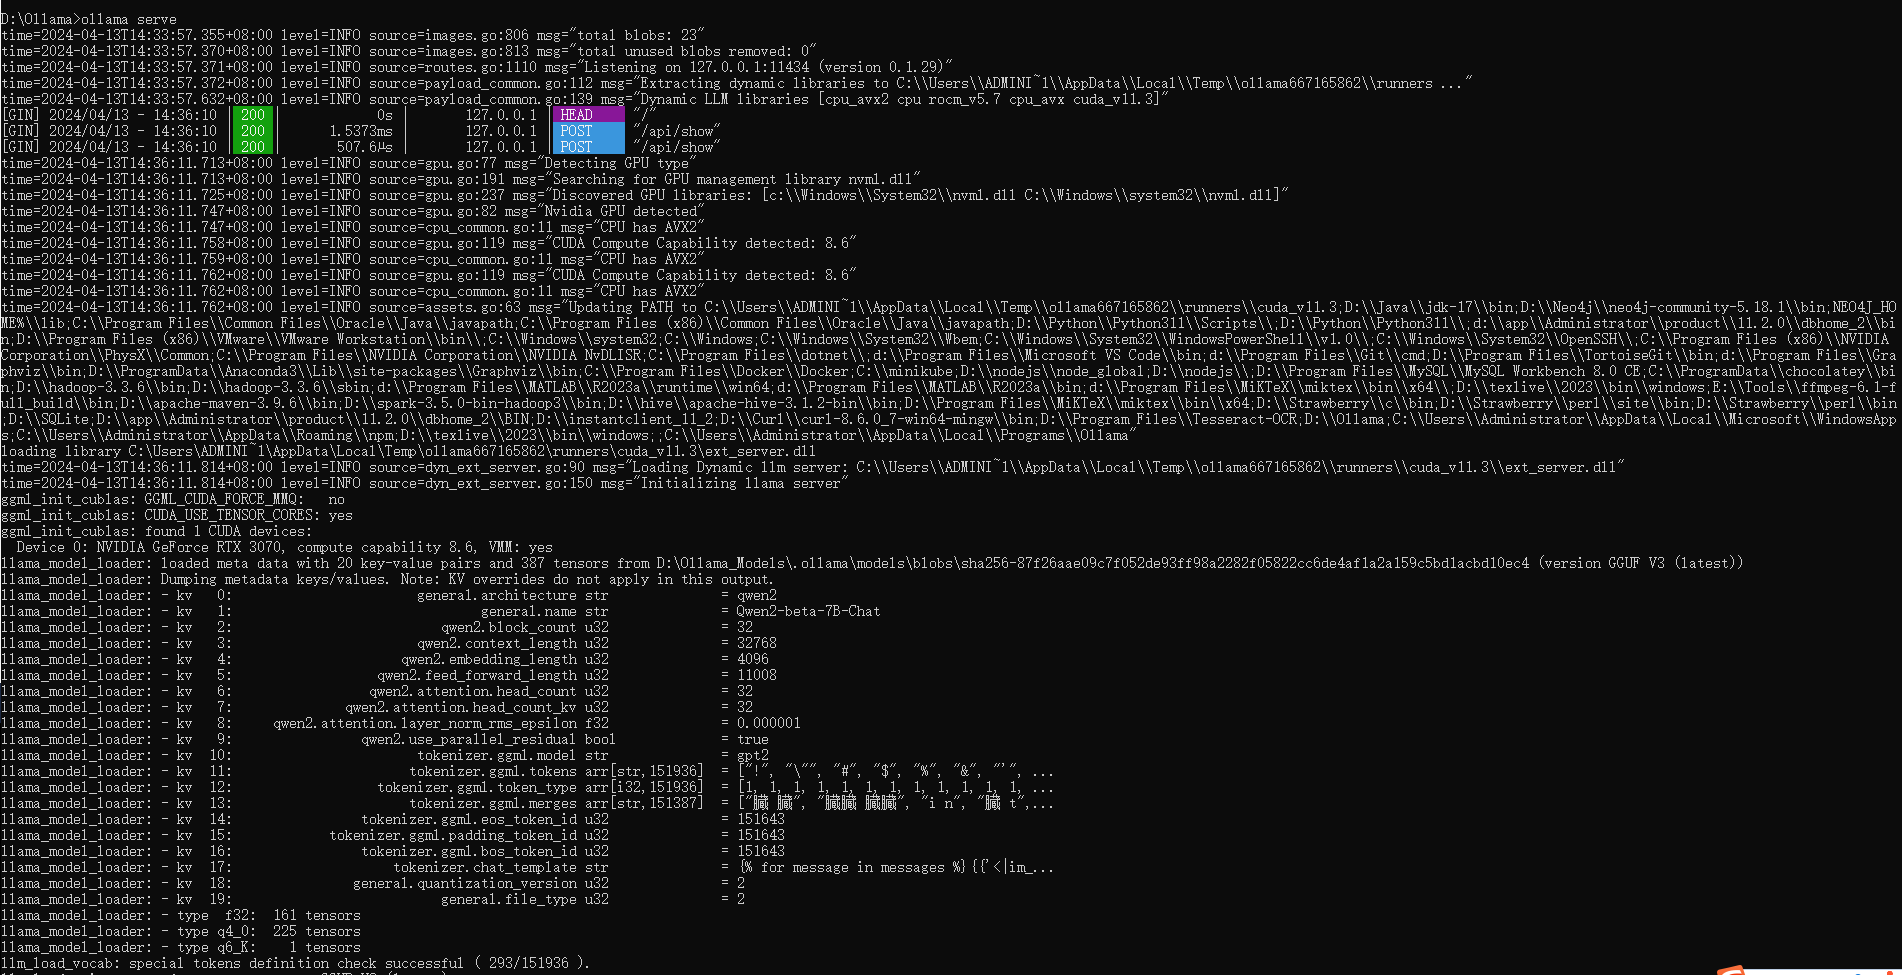

In [1]:
%pip install openai

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ---------------------------------------- 0.0/268.3 kB ? eta -:--:--
     --------------------- ---------------- 153.6/268.3 kB 3.1 MB/s eta 0:00:01
     -------------------------------------- 268.3/268.3 kB 3.3 MB/s eta 0:00:00
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/14/fd/2f20c40b45e4fb4324834aea24bd4afdf1143390242c0b33774da0e2e34f/anyio-4.3.0-py3-none-any.whl (85 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/12/b3/231ffd4ab1fc9d679809f356cebee130ac7daa00d6d6f3206dd4fd137e9e/distro-1.9.0-py3-none-any.whl (20 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/41/7b/ddacf6dcebb42466abd03f368782142baa82e08fc0c1f8eaa05b4bae87d5/httpx-0.27.0-py3-none-any.whl (75 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/e9/44/75a9c9421471a6c4805dbf2356f7c181a29c1879239abab1ea2cc8f38b40/sniffio-1.3.1-py3-none-any.whl (10 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packa

In [1]:
# 连接Ollama测试
from openai import OpenAI

client = OpenAI(
    base_url = 'http://localhost:11434/v1',
    api_key='ollama', # required, but unused
)

response = client.chat.completions.create(
  model="qwen:7b",
  messages=[
    {"role": "system", "content": "你是一个拥有丰富数据库经验的专家，为用户提供技术咨询服务"},
    {"role": "user", "content": "你会了解哪些种类的数据库"},
    {"role": "assistant", "content": "你熟悉常用的各类数据库比如Oracle，SqlServer,，Neo4j以及Mongo等等"},
    {"role": "user", "content": "我有一个Neo4j数据库可，你能帮我编写查询语句吗？"}
  ]
)
print(response.choices[0].message.content)

当然可以。Neo4j是一种用于存储和操作网络数据（如社交关系）的图数据库管理系统。

以下是一些基本的 Neo4j 查询示例：

1. **创建节点**:
   ```
   CREATE (p:Person {name:"Alice"}});
   ```
   
2. **查询特定节点**:
   ```
   MATCH (p:Person {name:"Alice"}}) RETURN p;
   ```

3. **添加关系**:
   ```
   MATCH (a:Author), (b:Book) WHERE a.name = 'Alice' AND b.title = 'The Adventure' CREATE (a)-[:WRITTEN_BY]-(b);
   ```

4. **查询路径或关系**:
   ```
   MATCH p=(a:Author)-[:WRITTEN_BY]->(b:Book) WHERE a.name = 'Alice' AND b.title = 'The Adventure' RETURN p;
   ```

请注意，实际的查询语句会根据你的具体需求和数据模型进行调整。





3、准备Neo4j本地数据库

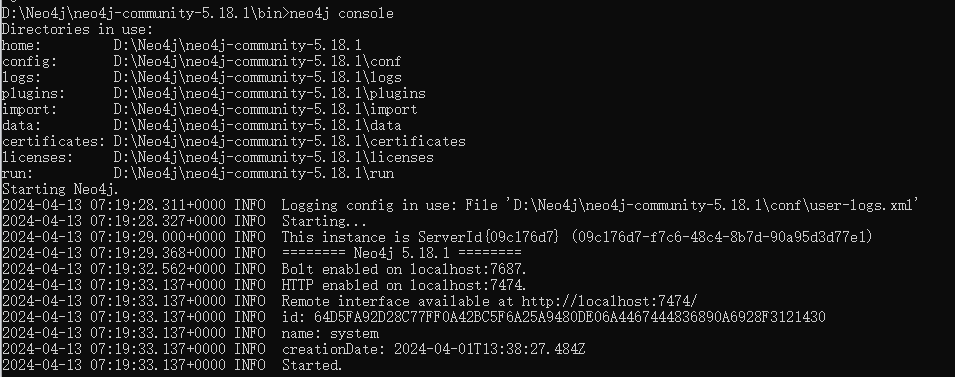

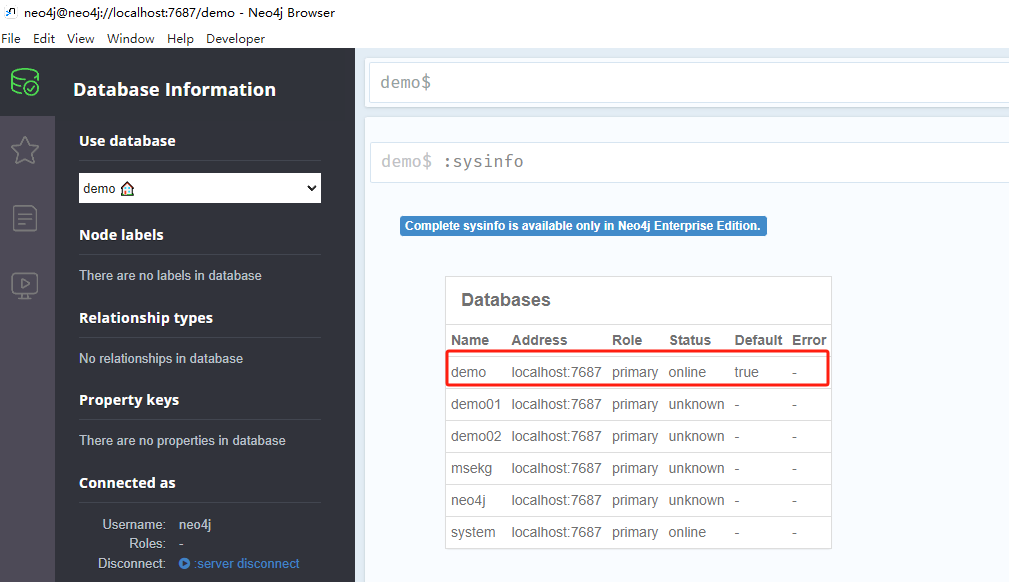

4、导入测试数据

示例数据：
./data/hospitals.csv

./data/patients.csv

./data/payers.csv

./data/physicians.csv

./data/reviews.csv

./data/visits.csv

导入Hospital数据效果如下：
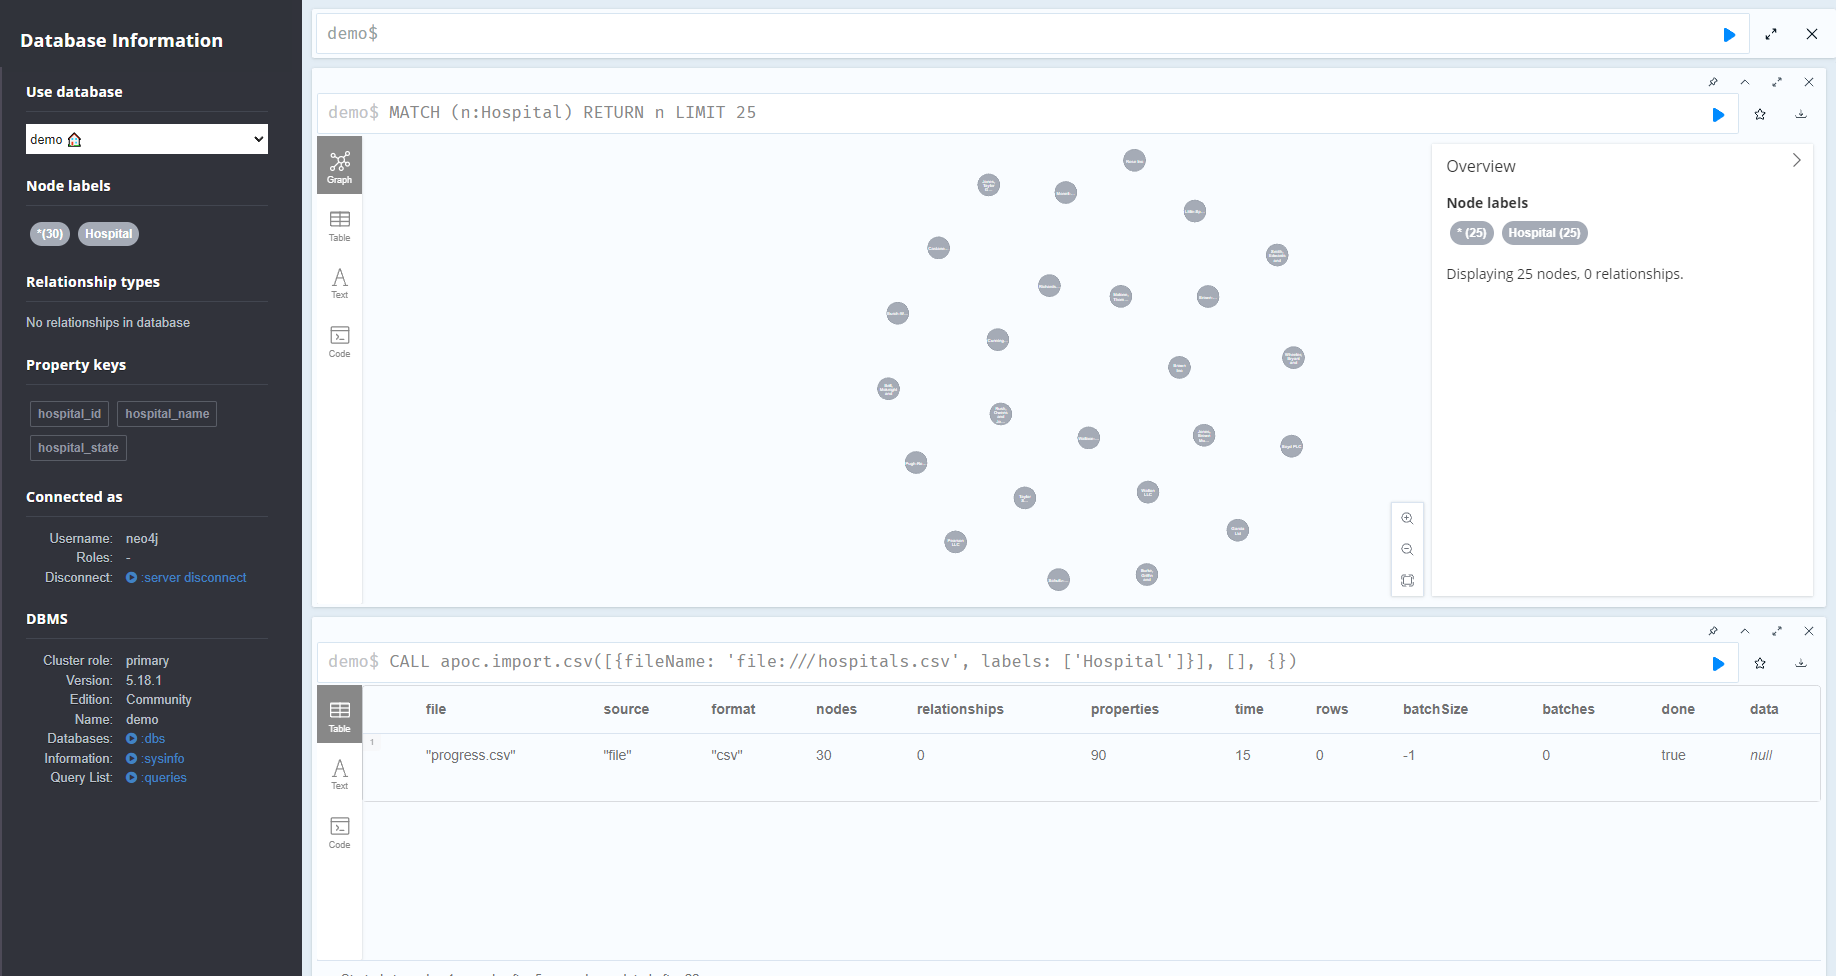

5、添加表之间关联关系

语句详见：neo4j_query_saved_cypher_2024-4-7.csv

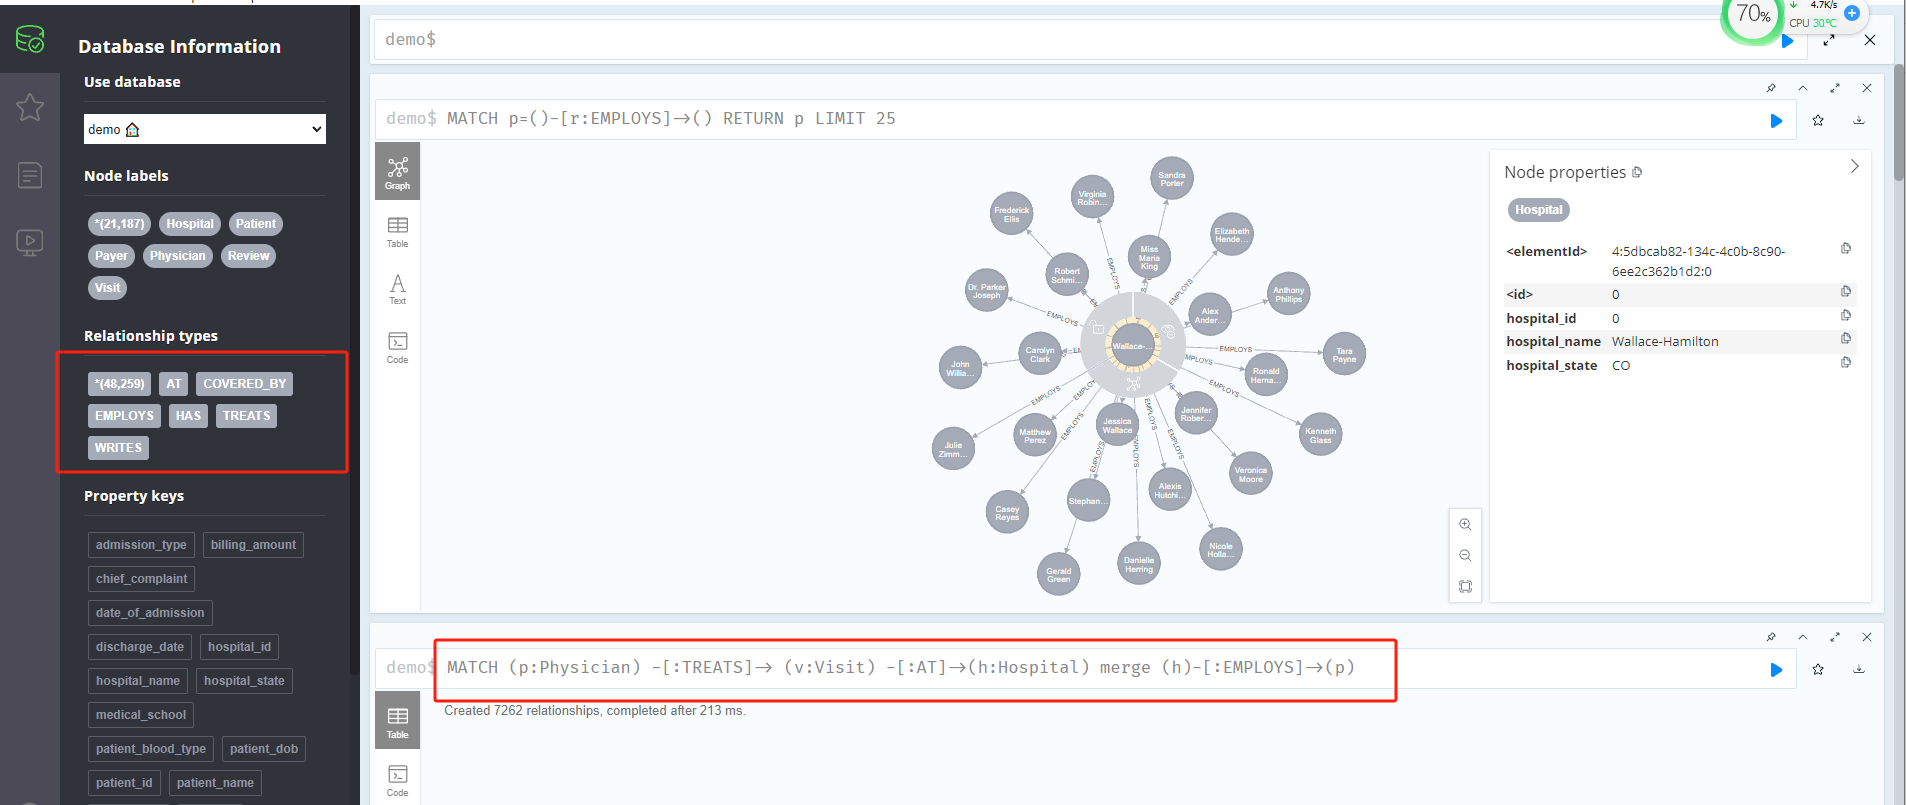

6、通过Python连接Neo4j数据库

In [5]:
%pip install neo4j

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached neo4j-5.19.0-py3-none-any.whl
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/9c/3d/a121f284241f08268b21359bd425f7d4825cffc5ac5cd0e1b3d82ffd2b10/pytz-2024.1-py2.py3-none-any.whl (505 kB)
Note: you may need to restart the kernel to use updated packages.


  6.1 通过Neo4j原生方法连接数据库

In [7]:
from neo4j import GraphDatabase

uri = "bolt://localhost:7687"  # 替换为你的Neo4j数据库URI
user = "neo4j"  # 替换为你的Neo4j用户名
password = "dswzlygs"  # 替换为你的Neo4j密码
database="demo"

driver = GraphDatabase.driver(uri, auth=(user, password))

def query_movie_database():
    with driver.session() as session:
        # 执行一个Cypher查询，查询医院名称为“Cunningham and Sons”的节点信息
        statement = "MATCH (h:Hospital) WHERE h.hospital_name = 'Cunningham and Sons' RETURN h"
        
        # 执行查询并获取结果
        result = session.run(statement)
        
        # 遍历结果并打印
        for record in result:
            print(record)

# 调用函数
query_movie_database()

# 关闭驱动连接
driver.close()

<Record h=<Node element_id='4:5dbcab82-134c-4c0b-8c90-6ee2c362b1d2:18' labels=frozenset({'Hospital'}) properties={'hospital_id': '18', 'hospital_state': 'TX', 'hospital_name': 'Cunningham and Sons'}>>


  6.2 通过Langchain连接数据库
  
注意：Neo4j需要启用APOC插件，详细配置请见.config下示例

In [ ]:
%pip install langchain_community
%pip install langchain-openai

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ---------------------------------------- 0.0/798.7 kB ? eta -:--:--
     -------------- ----------------------- 307.2/798.7 kB 6.3 MB/s eta 0:00:01
     ------------------------------------ - 768.0/798.7 kB 8.1 MB/s eta 0:00:01
     -------------------------------------- 798.7/798.7 kB 8.4 MB/s eta 0:00:00
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/83/eb/144d2db5cf2ac3989d0ea4273040218d68bd67422133548da47043423594/regex-2023.12.25-cp310-cp310-win_amd64.whl (269 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
from langchain_community.graphs import Neo4jGraph

graph = Neo4jGraph(
    url="neo4j://127.0.0.1:7687",
    username="neo4j",
    password="dswzlygs",
    database="demo"
)

# 执行一个Cypher查询，测试连接效果
query = "MATCH (n:Patient) RETURN n LIMIT 25"
results = graph.query(query)

# 遍历结果
for record in results:
    print(record)

{'n': {'patient_blood_type': 'O+', 'patient_dob': '1994-10-06', 'patient_sex': 'Female', 'patient_id': '0', 'patient_name': 'Tiffany Ramirez'}}
{'n': {'patient_blood_type': 'A-', 'patient_dob': '1973-03-31', 'patient_sex': 'Male', 'patient_id': '1', 'patient_name': 'Ruben Burns'}}
{'n': {'patient_blood_type': 'O-', 'patient_dob': '1932-05-10', 'patient_sex': 'Male', 'patient_id': '2', 'patient_name': 'Chad Byrd'}}
{'n': {'patient_blood_type': 'AB+', 'patient_dob': '1944-10-04', 'patient_sex': 'Male', 'patient_id': '3', 'patient_name': 'Antonio Frederick'}}
{'n': {'patient_blood_type': 'AB+', 'patient_dob': '1989-01-26', 'patient_sex': 'Male', 'patient_id': '4', 'patient_name': 'Mrs. Brandy Flowers'}}
{'n': {'patient_blood_type': 'A+', 'patient_dob': '1962-10-04', 'patient_sex': 'Male', 'patient_id': '5', 'patient_name': 'Patrick Parker'}}
{'n': {'patient_blood_type': 'B-', 'patient_dob': '1960-11-23', 'patient_sex': 'Male', 'patient_id': '6', 'patient_name': 'Charles Horton'}}
{'n': {'